<a href="https://colab.research.google.com/github/hayleypc/HawaiiClimate/blob/main/unpack_HIC_pickles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
from statistics import mean
import os
import gc
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from itertools import chain
from shapely.geometry import Point

!pip install diptest
import diptest

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
set_lists =[np.array([73,  1, 60, 18, 58]),
            np.array([23, 76, 51, 63, 66]),
            np.array([31, 47, 30, 20,  5]),
            np.array([15, 77, 43, 53, 12]),
            np.array([ 3, 56, 29, 75, 13]),
            np.array([70, 42, 65, 52, 54]),
            np.array([46, 41, 50, 40, 82]),
            np.array([67, 24, 84, 61,  6]),
            np.array([26, 74, 17,  2, 44]),
            np.array([81, 71, 49, 45, 88]),
            np.array([22, 11, 86, 83, 14]),
            np.array([33, 27, 25, 59, 38]),
            np.array([68, 39, 78, 69, 87]),
            np.array([16, 19, 48, 21, 79]),
            np.array([57, 72, 80, 64, 28]),
            np.array([62, 85])]

In [4]:
result_list = [pickle.load(open(f'/content/drive/MyDrive/hawaii_soils/result_list_{set_list_id}.pkl', 'rb')) for set_list_id in range(len([set_lists]))]

In [5]:
with open('/content/drive/MyDrive/hawaii_soils/result_list_12.pkl', 'rb') as file:
    result_list = pickle.load(file)

In [6]:
# Assuming set_lists is a list or range with the correct number of files
result_list = [pickle.load(open(f'/content/drive/MyDrive/hawaii_soils/result_list_{set_list_id}.pkl', 'rb')) for set_list_id in range(len(set_lists))]


In [7]:
flattened_result_list = [item for sublist in result_list for item in sublist]

In [8]:
len([flattened_result_list[i]['xval_id'] for i in range(len(flattened_result_list))])

77

In [9]:
diptest_result_list = [ np.mean([(diptest.dipstat(dict_thing['imp_c_quantiles'])>.05) == (diptest.dipstat(thing)>.05) for thing in dict_thing['prediction_quantiles']]) for dict_thing in flattened_result_list]

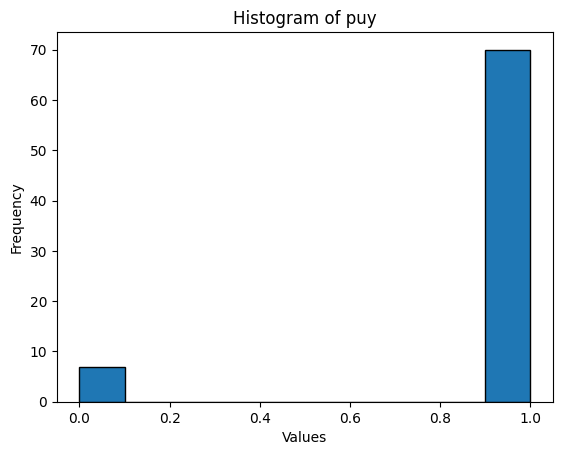

In [10]:
# Assuming 'puy' is a list of values
puy = diptest_result_list

# Create a histogram
plt.hist(puy, bins=10, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of puy')
plt.show()

In [11]:
[i for i in flattened_result_list[0]]

['xval_id',
 'lat_lon',
 'xy_sample',
 'xy_driver',
 'imp_c_scaled',
 'imp_c_quantiles',
 'real_predicted_labels',
 'real_diptest',
 'scaled_predictions',
 'prediction_quantiles',
 'predicted_predicted_labels',
 'predicted_diptest']

In [12]:
# flattened_result_list[0]['lat_lon']

In [13]:
# flattened_result_list[0]['xy_driver']

In [14]:
# flattened_result_list[0]['xy_sample']

In [15]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry= [Point(point.x,point.y) for point in flattened_result_list[12]['xy_driver']] )
# gdf['predicted_predicted_labels'] = flattened_result_list[12]['predicted_predicted_labels']
gdf['real_predicted_labels'] = [flattened_result_list[12]['real_predicted_labels'][0] for i in range(len(gdf))]
gdf['predicted_predicted_labels'] = flattened_result_list[12]['predicted_predicted_labels']
gdf['scaled_predictions'] = [i[5] for i in flattened_result_list[12]['scaled_predictions']]

# Optionally, set a coordinate reference system (CRS)
gdf.set_crs(epsg=32604, inplace=True)  # Example CRS, replace with your appropriate CRS
gdf.to_file('example.gpkg')

In [16]:
# [(xval['real_predicted_labels'][0], max(set(xval['predicted_predicted_labels']), key=xval['predicted_predicted_labels'].count)) for xval in flattened_result_list ]

In [17]:
combined_list = list(chain([(xval['real_predicted_labels'][0], label) for xval in flattened_result_list for label in xval['predicted_predicted_labels']]))
print(combined_list)

[('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'uniform'), ('uniform', 'un

In [36]:
combined_list =  [
    (xval['real_predicted_labels'][0],
     max(set(xval['predicted_predicted_labels'].tolist()), key=xval['predicted_predicted_labels'].tolist().count))
    for xval in flattened_result_list ]

In [37]:
y_true= [o[0] for o in combined_list]
y_pred = [o[1] for o in combined_list]
# Define the labels
labels =list(set(y_true))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Create a DataFrame for the confusion matrix with labels
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Display the confusion matrix with labels
print(cm_df)

              left tailed  normal  right tailed  uniform
left tailed             0       6             2        3
normal                  0       4             3        6
right tailed            1      17             2        9
uniform                 0      16             2        6


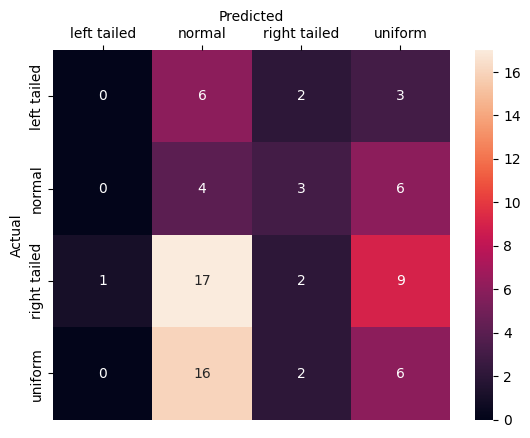

In [38]:

# Example data
y_true = [o[0] for o in combined_list]
y_pred = [o[1] for o in combined_list]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred,labels= list(set(y_true)))

# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm_df, annot=True, fmt='d', xticklabels=list(set(y_true)), yticklabels=list(set(y_true)))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='left')
plt.gca().xaxis.set_ticks_position('top')  # Move x-axis ticks to the top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to the top
plt.show()

In [26]:
imput_results = [(item[5] , result['imp_c_quantiles'][5]) for result in flattened_result_list for item in result['prediction_quantiles']]

In [27]:
len(flattened_result_list[0]['xy_driver'])

175

In [28]:
unique_arrays = [list(x) for x in set(tuple(arr) for arr in flattened_result_list[0]['prediction_quantiles'])]

In [29]:
len(unique_arrays)

112

In [30]:
len(flattened_result_list[0]['prediction_quantiles'])

175

In [31]:
y_res_list = []
x_res_list = []
for quantile_n in range(10):
  # Calculate the mean of item[x] values directly for each result in flattened_result_list
  imput_results = [(mean(item[quantile_n] for item in result['prediction_quantiles']), result['imp_c_quantiles'][quantile_n]) for result in flattened_result_list]
  x_res = [i[0] for i in imput_results]
  y_res = [i[1] for i in imput_results]
  x_res_list.append(x_res)
  y_res_list.append(y_res)

y_res = [item for sublist in y_res_list for item in sublist]
x_res = [item for sublist in x_res_list for item in sublist]


In [32]:
# [result['imp_c_quantiles'][quantile_n] for result in flattened_result_list]

In [33]:
# max(x_res)[0]

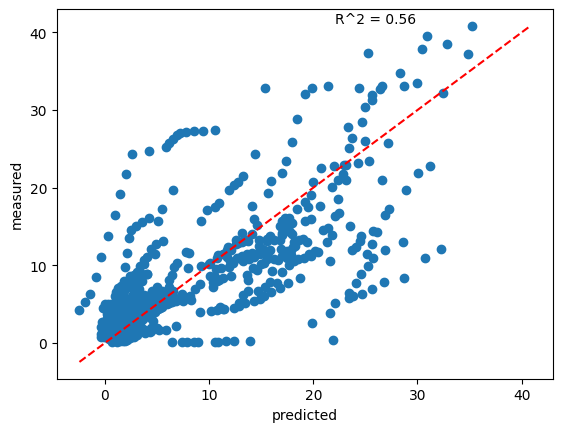

In [34]:
x_res = np.array(x_res).reshape(-1, 1)  # Reshape if data is a 1D array
y_res = np.array(y_res)

# Flatten x_res to match y_res dimensionality
x_res_flat = x_res.flatten()

# Perform linear regression
model = LinearRegression().fit(x_res, y_res)
r_squared = model.score(x_res, y_res)  # R-squared

# Create scatter plot
plt.scatter(x_res, y_res)
plt.xlabel('predicted')
plt.ylabel('measured')
plt.title('')

# Add a 1:1 line
max_val = max(max(x_res_flat), max(y_res))
min_val = min(min(x_res_flat), min(y_res))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # 1:1 line in red dashed

# Annotate the plot with the R-squared value
x_annotate = max(x_res_flat)
y_annotate = max(y_res)
plt.annotate(f'R^2 = {r_squared:.2f}', xy=(x_annotate, y_annotate), xycoords='data',
             xytext=(-40, 10), textcoords='offset points',
             ha='right', va='top')

plt.show()


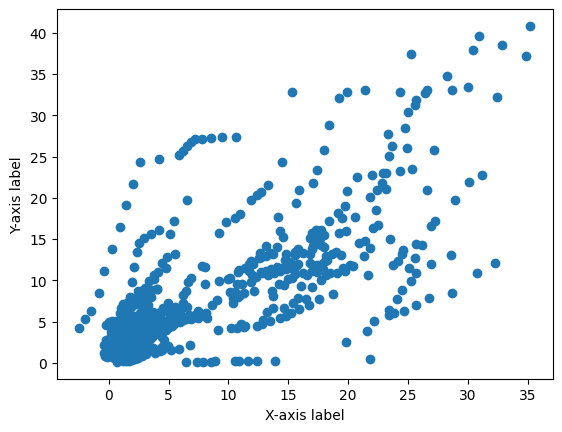

In [35]:
plt.scatter(x_res, y_res)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('')

max_val = max(max(x_res), max(y_res))
min_val = min(min(x_res), min(y_res))
#plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.show()
